In [101]:
import pandas as pd

# Librerías usadas para estandarizar la información
import repositories.dicts as dicts
import repositories.utils as utils

#Librerías gráficas y de procesamiento matemático
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# set color palette seaborn grey
sns.set_palette("Greys")

import dataframe_image as dfi

## Lectura de datos consolidados nacionales para el periodo completo

In [128]:
df=pd.read_csv("output_files/Cancer_1998_2018.csv")
df

,Unnamed: 0,ano,est_civil,gru_ed1,gru_ed2,nivel_edu,codptore,codmunre,area_res,seg_social,...,c_bas1,c_mcm1,cau_homol,ultcurfal,ocupacion,idpertet,idadmisalud,causa_667,codmunicipio,ok
0,376,1998.0,5,14,4,5,19,75,2.0,2,...,C509,C509,24,NaN,NaN,NaN,NaN,NaN,19075,0
1,377,1998.0,6,23,6,2,27,1,1.0,9,...,C509,C509,24,NaN,NaN,NaN,NaN,NaN,27001,0
2,378,1998.0,6,18,5,3,47,541,2.0,2,...,C509,C509,24,NaN,NaN,NaN,NaN,NaN,47541,0
3,379,1998.0,5,22,6,2,50,1,1.0,5,...,C509,C509,24,NaN,NaN,NaN,NaN,NaN,50001,0
4,380,1998.0,4,22,6,1,54,99,3.0,5,...,C509,C509,24,NaN,NaN,NaN,NaN,NaN,54099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46884,236364,2018.0,6,14,4,14,8,1,1.0,3,...,C509,NaN,24,99.0,PROFESORES DE EDUCACIÓN SECUNDARIA,Ninguno de las anteriores,5.0,206.0,8001,0
46885,236540,2018.0,4,23,6,14,11,1,1.0,1,...,C509,NaN,24,99.0,HOGAR,Ninguno de las anteriores,1.0,206.0,11001,0
46886,236622,2018.0,9,20,5,14,76,275,1.0,2,...,C509,NaN,24,99.0,HOGAR,Ninguno de las anteriores,2.0,206.0,76275,0
46887,236676,2018.0,6,19,5,2,8,1,1.0,2,...,C509,NaN,24,5.0,HOGAR,Ninguno de las anteriores,2.0,206.0,8001,0


# Análisis del comportamiento anual

In [116]:
growth=df.groupby('ano')[['est_civil']].count().reset_index()
#rename columns of growth
growth.columns=['ano','total']

#  change the type of a column inplace
growth.ano=growth.ano.astype(int)

# compute the percentual increment against previous year
growth['delta']=growth['total'].pct_change()*100
display(growth)
print(f"average: {np.mean(growth['delta'])}, max: {np.max(growth['delta'])}, min: {np.min(growth['delta'])} ")
growth.to_clipboard()
#get the index of the minimum
growth['delta'].idxmin()
growth.iloc[growth['delta'].idxmin()]

,ano,total,delta
0,1998,1327,NaN
1,1999,1434,8.06
2,2000,1542,7.53
3,2001,1634,5.97
4,2002,1716,5.02
5,2003,1852,7.93
6,2004,1855,0.16
7,2005,1853,-0.11
8,2006,1910,3.08
9,2007,2115,10.73


average: 4.927550268408191, max: 10.732984293193715, min: -3.1328320802004983 


ano      2011.00
total    2319.00
delta      -3.13
Name: 13, dtype: float64

# Exploración de las variables gru_ed1 y gru_ed2


In [117]:
crstab_gr_ed1=pd.crosstab(df.gru_ed1, df.ano.astype(int), values=df.ano, aggfunc="count").fillna(0).apply(lambda x: x/x.sum()).applymap(lambda x: "{:.0f}%".format(100*x))



est_civil,1,2,3,4,5,6,9
ano,,,,,,,
1998,127.0,0.0,54.0,223.0,262.0,524.0,137.0
1999,137.0,0.0,52.0,282.0,319.0,574.0,70.0
2000,182.0,0.0,74.0,272.0,307.0,643.0,64.0
2001,168.0,0.0,92.0,318.0,357.0,637.0,62.0
2002,199.0,0.0,96.0,334.0,355.0,640.0,92.0
2003,196.0,0.0,107.0,371.0,388.0,697.0,93.0
2004,209.0,0.0,110.0,365.0,366.0,702.0,103.0
2005,215.0,0.0,116.0,405.0,337.0,691.0,89.0
2006,257.0,0.0,124.0,372.0,350.0,703.0,104.0


ano,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
gru_ed1,,,,,,,,,,,,,,,,,,,,,
De 10 a 14 años,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
De 15 a 19 años,0.1,0.0,0.1,0.0,0.2,0.1,0.1,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
De 20 a 24 años,0.1,0.3,0.3,0.1,0.2,0.3,0.2,0.1,0.1,0.1,...,0.0,0.3,0.1,0.1,0.2,0.1,0.2,0.1,0.1,0.1
De 25 a 29 años,0.9,1.0,0.8,0.5,0.6,0.4,0.9,0.8,0.6,0.5,...,0.7,1.0,0.5,0.8,0.7,0.4,0.6,0.6,0.5,0.8
De 30 a 34 años,3.2,2.6,2.4,2.6,3.0,2.3,2.4,2.3,1.9,2.2,...,2.1,2.0,2.0,2.3,2.5,2.3,1.8,1.5,1.6,2.1
De 35 a 39 años,4.5,4.8,4.5,5.2,5.4,4.8,4.7,4.3,5.3,4.7,...,4.9,4.4,4.1,4.1,3.8,3.2,3.2,3.4,4.2,4.2
De 40 a 44 años,8.6,8.6,9.3,9.1,8.3,9.2,8.2,7.1,9.3,7.6,...,7.4,7.1,6.6,6.9,6.3,6.5,6.4,6.3,5.8,5.5
De 45 a 49 años,11.9,12.2,13.6,12.4,11.5,10.7,12.0,10.1,11.1,12.0,...,11.8,10.0,11.4,10.9,9.8,10.4,9.5,10.1,8.6,9.6
De 50 a 54 años,12.5,12.8,12.4,12.7,13.2,13.7,13.2,13.1,14.1,11.6,...,12.4,12.9,13.5,12.7,13.1,11.5,12.1,12.7,11.5,11.9


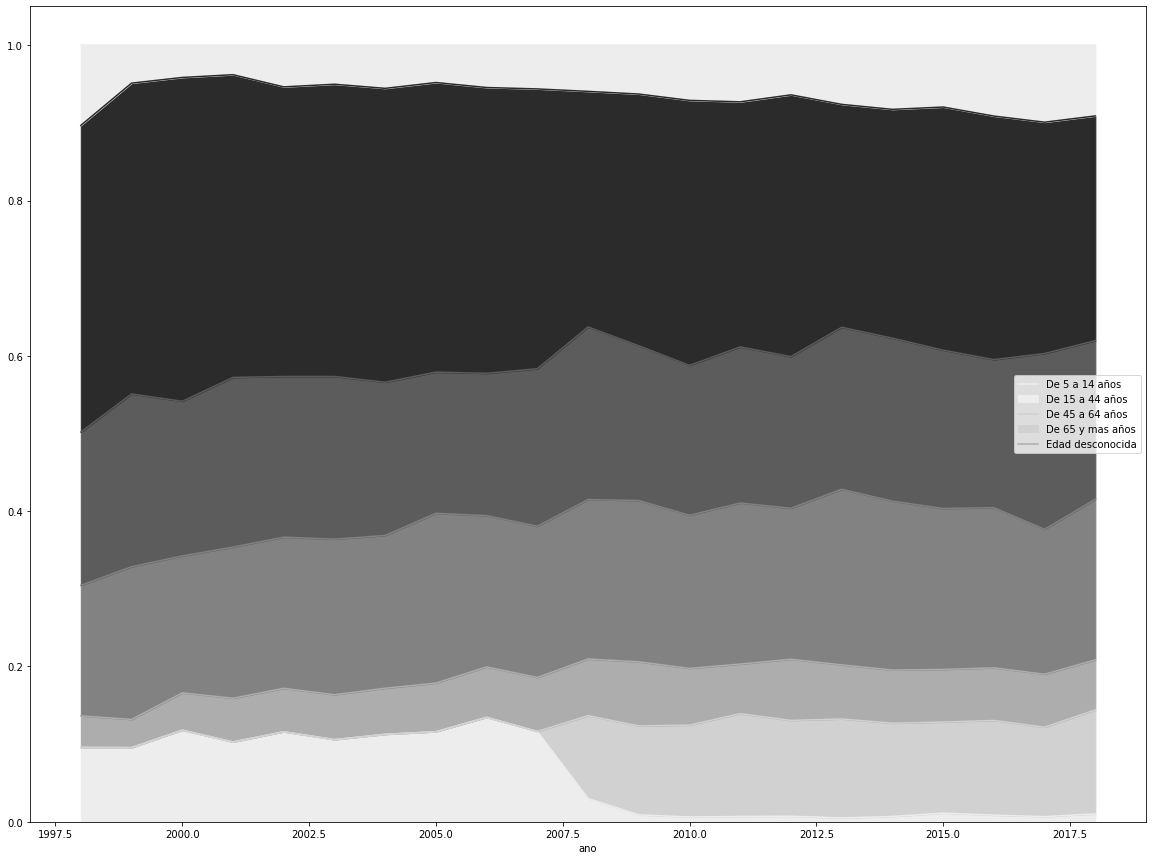

In [118]:
#table=pd.crosstab(df.gru_ed1, df.ano.astype(int), values=df.ano, aggfunc="count").fillna(0).apply(lambda x: x/x.sum()).applymap(lambda x: "{:.0f}%".format(100*x))

dic_gr_ed1={'De 10 a 14 años': '10',
 'De 15 a 19 años': '11',
 'De 20 a 24 años': '12',
 'De 25 a 29 años': '13',
 'De 30 a 34 años': '14',
 'De 35 a 39 años': '15',
 'De 40 a 44 años': '16',
 'De 45 a 49 años': '17',
 'De 50 a 54 años': '18',
 'De 55 a 59 años': '19',
 'De 60 a 64 años': '20',
 'De 65 a 69 años': '21',
 'De 70 a 74 años': '22',
 'De 75 a 79 años': '23',
 'De 80 a 84 años': '24',
 'mayores de 85 años': '25',
 'Edad desconocida': '26'}
 
# dict from lists
dic_gr_ed1 = {int(k):v for k,v in zip(dic_gr_ed1.values(),dic_gr_ed1.keys())}

df.gru_ed1=df.gru_ed1.replace(dic_gr_ed1)
table = pd.pivot_table(df, values='gru_ed1', index=[df.ano.astype(int)],
                    columns=['est_civil'], aggfunc="count").fillna(0)
fig, ax = plt.subplots(figsize=(20,15))
table.divide(table.sum(axis=1), axis=0).plot.area(stacked=True,ax=ax,use_index=True)
#table.plot.area(stacked=True,ax=ax,use_index=True)
ax.legend(['De 5 a 14 años', 'De 15 a 44 años', 'De 45 a 64 años', 'De 65 y mas años', 'Edad desconocida']);
display(table)
table=pd.crosstab( df.gru_ed1,df.ano.astype(int), values=df.ano, aggfunc="count").fillna(0).apply(lambda x: np.round(x/x.sum()*100,1))
display(table)


#apply over rows
pd.set_option('display.precision', 2)

df_styled=table.style.background_gradient(cmap='Blues')

dfi.export(df_styled, "output_files/Cancer_1998_2018_styled.jpg")

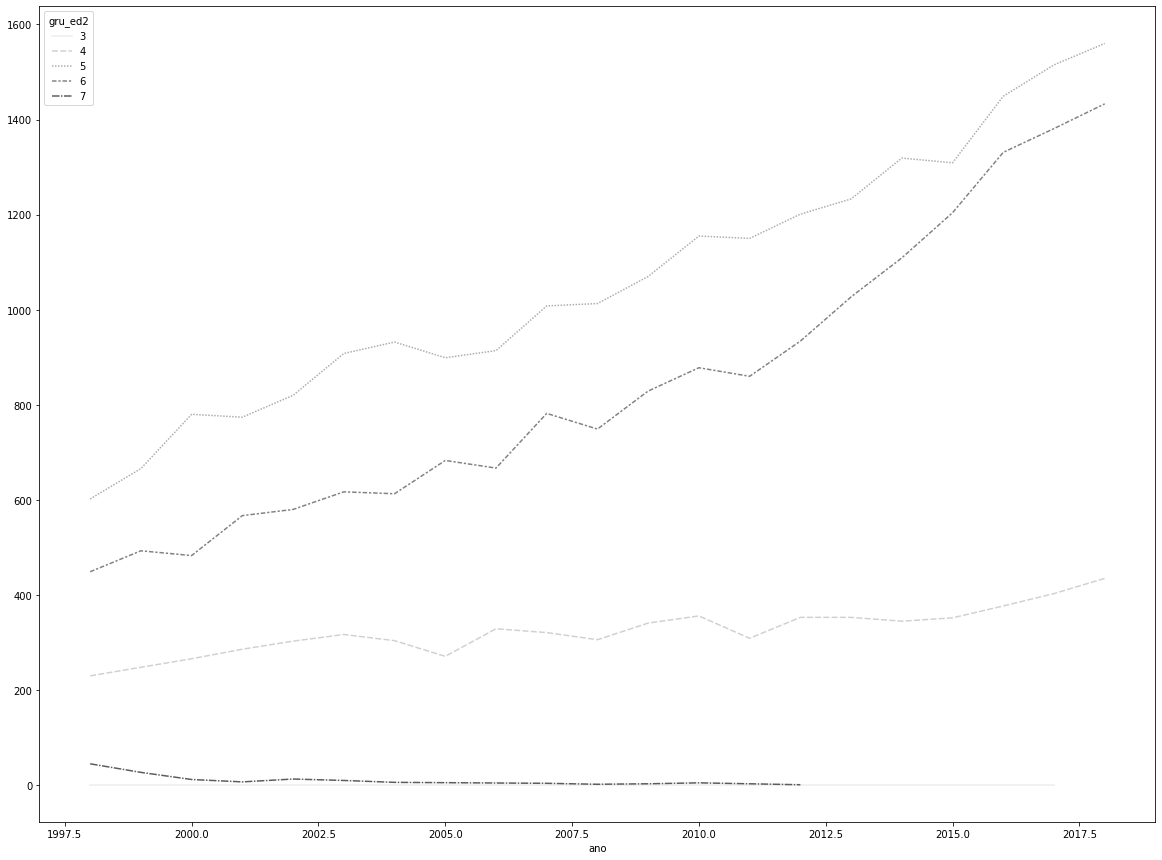

In [119]:
# plotly  express plot of crosstab
table = pd.pivot_table(df[df.gru_ed1.notna() & df.gru_ed1.notnull() ], values='gru_ed1', index=['ano'],
                    columns=['gru_ed2'], aggfunc="count")
fig, ax = plt.subplots(figsize=(20,15))
g=sns.lineplot(ax=ax,data=table)

In [120]:
px.histogram(df.sort_values(by='gru_ed1'), color='gru_ed1', x='ano', height=600,width=800,barmode='stack')


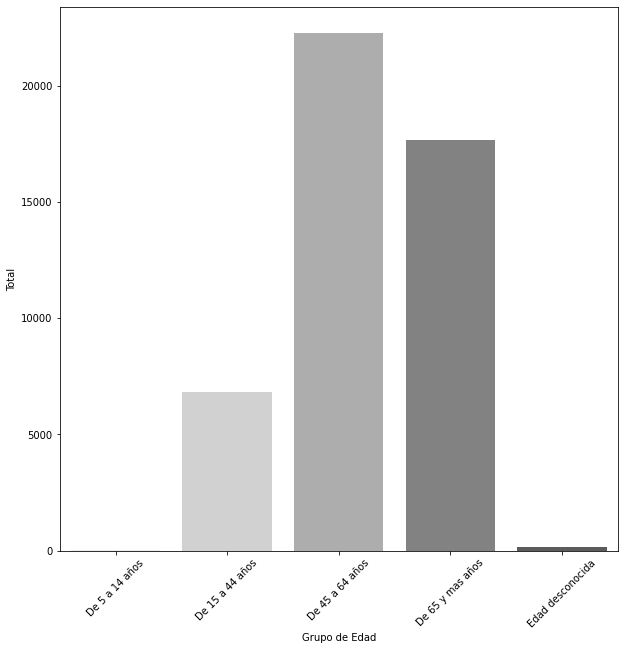

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.countplot(data = df, x = 'gru_ed2',   ax=ax)
ax.set(xlabel='Grupo de Edad', ylabel='Total')
#ax.set_xticks([3,4,5,6,7])
ax.set_xticklabels(['De 5 a 14 años',	'De 15 a 44 años',	'De 45 a 64 años',	'De 65 y mas años',	'Edad desconocida'],rotation=45)

fig.savefig("gru_ed2.jpg")

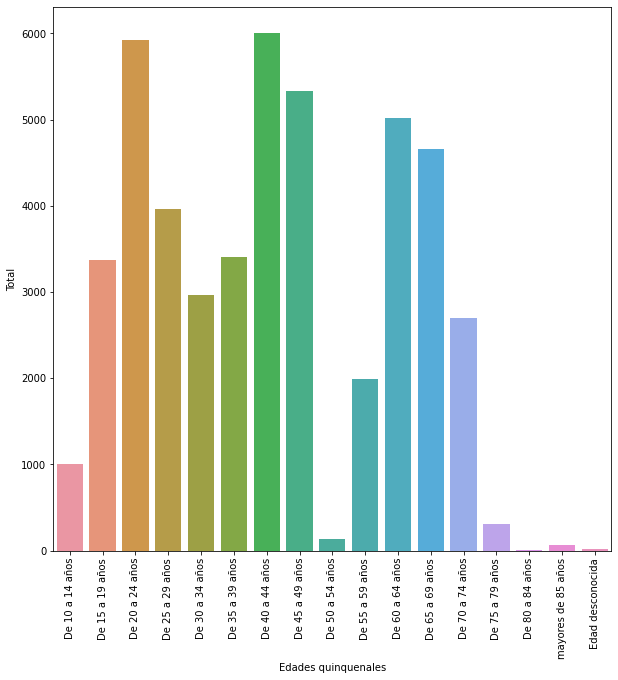

In [122]:
dicts.dicGrEdad1

# get the type of a variable

dic_gr_ed1={'De 10 a 14 años': '10',
 'De 15 a 19 años': '11',
 'De 20 a 24 años': '12',
 'De 25 a 29 años': '13',
 'De 30 a 34 años': '14',
 'De 35 a 39 años': '15',
 'De 40 a 44 años': '16',
 'De 45 a 49 años': '17',
 'De 50 a 54 años': '18',
 'De 55 a 59 años': '19',
 'De 60 a 64 años': '20',
 'De 65 a 69 años': '21',
 'De 70 a 74 años': '22',
 'De 75 a 79 años': '23',
 'De 80 a 84 años': '24',
 'mayores de 85 años': '25',
 'Edad desconocida': '26'}
# dict from lists
dic_gr_ed1 = {int(k):v for k,v in zip(dic_gr_ed1.values(),dic_gr_ed1.keys())}

fig, ax = plt.subplots(figsize=(10,10))
#plt.hist(x=df.gru_ed1,bins=len(dic_gr_ed1),color='#3F5D7D')

sns.countplot(data = df, x = 'gru_ed1',ax=ax)
ax.set(xlabel='Edades quinquenales', ylabel='Total')
ticks=[dic_gr_ed1[i] for i in np.sort(list(dic_gr_ed1.keys()))]
ax.set_xticklabels(ticks,rotation=90)

fig.savefig("gru_ed1.jpg")


#  Análisis lugar de residencia

In [152]:
#df.area_res=df.area_res.map({1:'Urbano',2:'Centro Poblado',3:'Rural Disperso',9:'NA'})

pd.crosstab(df.area_res,df.ano.astype(int),  values=df.area_res, aggfunc="count").fillna(0).T#.apply(lambda x: np.round(x/x.sum()*100,1)).T
df.groupby("area_res")[["area_res"]].agg('count').apply(lambda x: np.round(x/x.sum()*100,1))

,area_res
area_res,
1.0,90.3
2.0,3.4
3.0,5.6
9.0,0.7


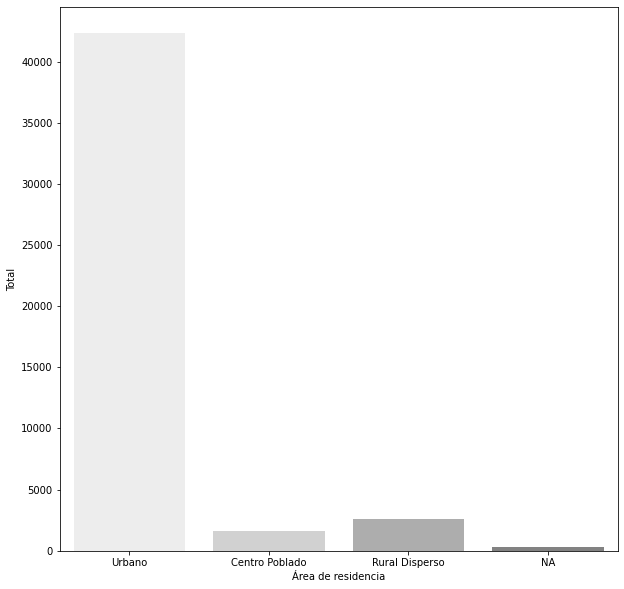

In [105]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.countplot(data = df, x = 'area_res',ax=ax)
ax.set(xlabel='Área de residencia', ylabel='Total')
ax.set_xticks([0.,1.,2.,3.])
ax.set_xticklabels(['Urbano','Centro Poblado','Rural Disperso','NA'])
fig.savefig("output_files/area_res.jpg")

# Análisis del nivel educativo

In [154]:
df=pd.read_csv("output_files/Cancer_1998_2018.csv")

dicts.dictNivelEdu
"""dic_nv_edu={ 'Sin información': 14,
 'Ninguno': 13,
 'Doctorado': 9,
 'Especialización': 9,
 'Maestría': 9,
 'Básica primaria': 2,
 'Básica secundaria': 3,
 'Media académica o clásica': 4,
 'Profesional': 9,
 'Media técnica': 5,
 'Tecnológica': 5,
 'Normalista': 5,
 'Técnica profesional': 5,
 'Preescolar': 1}
"""

dic_ne_num={ 14:'Sin información',
 13:13,
 12:9,
 10:9,
 11:9,
 2:2,
 3:3,
 4:3,
 9:9,
 5:5,
 6:5,
 7:5,
 8:5,
 1:1}

dic_nv_edu={ 14:'Sin información',
 13:'Ninguno',
 2:'Básica primaria',
 3:'Secundaria',
 9:'Profesional',
 5:'Tecnológica/Técnica',
 1:'Preescolar'}
 



df2=df.copy()
df2.nivel_edu=df2.nivel_edu.replace(dic_ne_num)
df2.nivel_edu=df2.nivel_edu.replace(dic_nv_edu)



['Preescolar', 'Básica primaria', 'Secundaria', 'Tecnológica/Técnica', 'Profesional', 'Ninguno', 'Sin información']


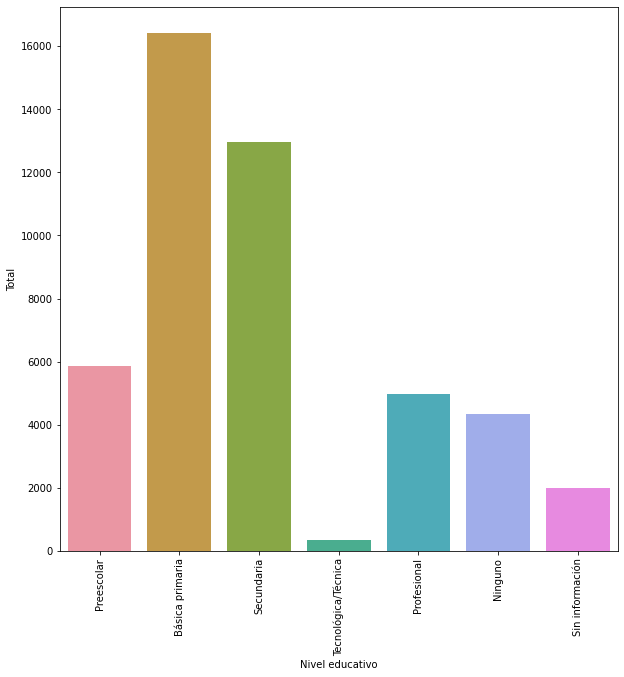

In [155]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data = df2, x = 'nivel_edu',ax=ax)
ax.set(xlabel='Nivel educativo', ylabel='Total')
ticks=[dic_nv_edu[i] for i in np.sort(list(dic_nv_edu.keys()))]
print(ticks)
ax.set_xticklabels(ticks,rotation=90)

fig.savefig("nv_edu.jpg")



In [156]:
table=pd.crosstab(df2.nivel_edu,df2.ano.astype(int),  values=df2.nivel_edu, aggfunc="count").fillna(0).apply(lambda x: np.round(x/x.sum()*100,1)).T
df2.groupby('nivel_edu')[["nivel_edu"]].count().apply(lambda x: np.round(x/x.sum()*100,1)).to_clipboard()

df_styled=table.style.background_gradient(cmap='Blues')

dfi.export(df_styled, "output_files/Cancer_1998_2018_styled.jpg")

# Análisis de la variable Afiliación a salud

In [180]:

 dict_ss={'Subsidiado': 2,
 'No asegurado': 5,
 'Sin información': 9,
 'Excepción': 3,
 'Contributivo': 1,
 'Especial': 4}
 dict_ss={j:i for i,j in dict_ss.items()}

df_ss=pd.DataFrame(df.seg_social.value_counts().reset_index())
df_ss.columns=['seg_social','total']
df_ss.seg_social=df_ss.seg_social.replace(dict_ss)
df_ss["proporción"]=df_ss.total 
df_ss["proporción"]=np.round(df_ss.proporción/df_ss.proporción.sum()*100,2)
df_ss.to_clipboard()

In [182]:
pd.crosstab(df.seg_social,df.ano.astype(int),  values=df.seg_social, aggfunc="count").fillna(0).apply(lambda x: np.round(x/x.sum()*100,1)).T

seg_social,1,2,3,4,5,9,99
ano,,,,,,,
1998,40.5,23.0,0.0,0.0,29.5,7.0,0.0
1999,45.2,21.9,0.0,0.0,27.8,5.1,0.0
2000,47.3,26.0,0.0,0.0,22.6,4.1,0.0
2001,49.3,27.2,0.0,0.0,19.5,4.0,0.1
2002,51.9,27.6,0.0,0.0,14.8,2.6,3.1
2003,53.2,26.5,0.0,0.0,14.8,1.6,4.0
2004,53.0,27.1,0.0,0.0,15.6,1.3,3.0
2005,54.7,27.9,0.0,0.0,13.3,1.1,3.0
2006,55.2,31.0,0.0,0.0,10.3,1.2,2.3


# Tasas crudas Colombia

In [185]:
df_1995_2004=pd.DataFrame(pd.read_excel("data/anexo-area-sexo-edad-proyecciones-poblacion-Municipal_1995-2004.xlsx"))
df_2004_2017=pd.DataFrame(pd.read_csv("data/anexo-area-sexo-edad-proyecciones-poblacion-Municipal_2005-2017.csv"))
df_2018=pd.DataFrame(pd.read_csv("data/anexo-proyecciones-poblacion-Municipal_2018-2026.csv"))
df_pob=pd.concat([df_1995_2004,df_2004_2017,df_2018])
df_pob

,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,Mujeres_0,Mujeres_1,Mujeres_2,Mujeres_3,...,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210
0,5,Antioquia,5001,Medellín,1995,Total,17225,17416,17660,17774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,Antioquia,5001,Medellín,1996,Total,17262,17501,17678,17896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,Antioquia,5001,Medellín,1997,Total,17180,17492,17718,17872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Antioquia,5001,Medellín,1998,Total,17056,17419,17711,17919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Antioquia,5001,Medellín,1999,Total,16865,17245,17605,17890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,99,Vichada,99773,Cumaribo,2022,Total,1072,1041,1019,1002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10094,99,Vichada,99773,Cumaribo,2023,Total,1073,1050,1026,1005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10095,99,Vichada,99773,Cumaribo,2024,Total,1047,1025,999,983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10096,99,Vichada,99773,Cumaribo,2025,Total,1049,1028,1005,990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:

df_pob["total"]=sum(df_pob["Mujeres_"+str(j)] for j in range(101))
    

In [208]:
df_pob=df_pob[['DP', 'DPNOM', 'DPMP', 'MPIO', 'AÑO', 'ÁREA GEOGRÁFICA','total']]
df_pob=df_pob.groupby('AÑO')[["total"]].sum()
df_pob=df_pob.reset_index()
df_pob

,AÑO,total
0,1995,18377490
1,1996,18696986
2,1997,19012893
3,1998,19322671
4,1999,19625225
5,2000,19917941
6,2001,20199714
7,2002,20471553
8,2003,20736272
9,2004,20995899


In [210]:
df=pd.read_csv("output_files/Cancer_1998_2018.csv")

df=df.groupby('ano')[["area_res"]].agg('count')
df=df.reset_index()
df.ano=df.ano.astype(int)
df

,ano,area_res
0,1998,1327
1,1999,1434
2,2000,1542
3,2001,1634
4,2002,1716
5,2003,1852
6,2004,1855
7,2005,1853
8,2006,1910
9,2007,2115


In [212]:
df=df.merge(df_pob,left_on='ano',right_on='AÑO')

In [213]:
df["tasa_cruda"]=np.round(df.area_res/df.total*100000,2)

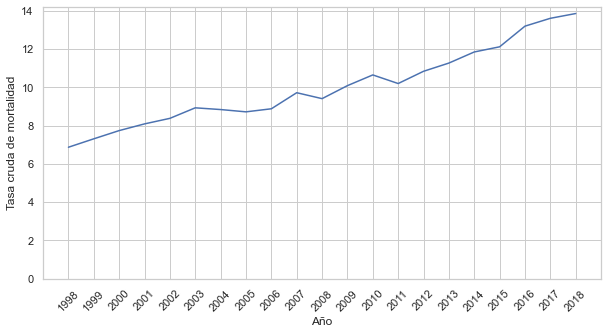

In [268]:
sns.set(style="whitegrid")
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=df,x='AÑO',y='tasa_cruda',ax=ax)
"""sns.lineplot(
    x=list(np.reshape(X_train,(X_train.shape[0],))),
    y=list(np.reshape(regr.predict(X_train),(X_train.shape[0],))),
    ax=ax)"""
# set axis limits
ax.set_xlim(1997,2019)
ax.set_ylim(0,)

# set axis labels
ax.set_xlabel('Año')
ax.set_ylabel('Tasa cruda de mortalidad')

#set xticks
ax.set_xticks(np.arange(1998,2019,1),rotation=90)

# rotate xticks 
for label in ax.get_xticklabels():
    label.set_rotation(45)



In [230]:
import sklearn.linear_model

# Create linear regression object
regr = sklearn.linear_model.LinearRegression()

#create the traing and test set
X_train = df[['ano']].values
y_train = df[['tasa_cruda']].values


# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [267]:
regr.score(X_train, y_train)

0.9564180979460027

In [259]:
# convert numpy array to vector




array([ 6.81515152,  7.13639827,  7.45764502,  7.77889177,  8.10013853,
        8.42138528,  8.74263203,  9.06387879,  9.38512554,  9.70637229,
       10.02761905, 10.3488658 , 10.67011255, 10.99135931, 11.31260606,
       11.63385281, 11.95509957, 12.27634632, 12.59759307, 12.91883983,
       13.24008658])

In [269]:
df[['ano','tasa_cruda']]

,ano,tasa_cruda
0,1998,6.87
1,1999,7.31
2,2000,7.74
3,2001,8.09
4,2002,8.38
5,2003,8.93
6,2004,8.84
7,2005,8.72
8,2006,8.88
9,2007,9.72
